In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from gxctmm import plot, wald

In [2]:
# yazar
yazar_f = '../../analysis/yazar/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9_geno_pca_n~6_op_pca_n~1_batch~shared_fixed~shared/he.free.jk.npy'
yazar_out = np.load(yazar_f, allow_pickle=True).item()
yazar = pd.DataFrame({'gene': yazar_out['gene'], 'yazar_hom_g2': yazar_out['free']['hom_g2'], 'yazar_hom_e2': yazar_out['free']['hom_e2'],
                      'yazar_V': np.mean(np.diagonal(yazar_out['free']['V'], axis1=1, axis2=2), axis=1), 
                      'yazar_W': np.mean(np.diagonal(yazar_out['free']['W'], axis1=1, axis2=2), axis=1), 
                      'p_yazar_V': -np.log10(yazar_out['p']['free']['V']), 'p_yazar_W': -np.log10(yazar_out['p']['free']['W'])})
yazar['yazar_g'] = yazar['yazar_hom_g2'] + yazar['yazar_V']
yazar['yazar_e'] = yazar['yazar_hom_e2'] + yazar['yazar_W']
yazar['yazar_specificity'] = yazar['yazar_V'] / yazar['yazar_g']
yazar['yazar_shared_h2'] = yazar['yazar_hom_g2'] / (yazar['yazar_g'] + yazar['yazar_e'])
yazar['yazar_specific_h2'] = yazar['yazar_V'] / (yazar['yazar_g'] + yazar['yazar_e'])

In [3]:
# cell type proportions
euro_cont_P_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.Healthy/P.final.gz'
euro_case_P_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.SLE/P.final.gz'
asia_case_P_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/Asian.SLE/P.final.gz'

euro_cont_P = pd.read_table(euro_cont_P_f, index_col=0)
euro_case_P = pd.read_table(euro_case_P_f, index_col=0)
asia_case_P = pd.read_table(asia_case_P_f, index_col=0)
euro_cont_N = euro_cont_P.shape[0]
euro_case_N = euro_case_P.shape[0]
asia_case_N = asia_case_P.shape[0]
N = euro_cont_N + euro_case_N + asia_case_N

# cis
euro_cont_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.Healthy/he.npy'
euro_case_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.SLE/he.npy'
asia_case_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/Asian.SLE/he.npy'
meta_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/he.free.meta.npy'

euro_cont_out = np.load(euro_cont_f, allow_pickle=True).item()
euro_case_out = np.load(euro_case_f, allow_pickle=True).item()
asia_case_out = np.load(asia_case_f, allow_pickle=True).item()
meta_out = np.load(meta_f, allow_pickle=True).item()

# make dataframe
euro_cont_dict = {'gene': euro_cont_out['gene'], 'hom_g2': euro_cont_out['free']['hom_g2'], 'hom_e2': euro_cont_out['free']['hom_e2'],
                  'V': np.mean(np.diagonal(euro_cont_out['free']['V'], axis1=1, axis2=2), axis=1), 
                  'W': np.mean(np.diagonal(euro_cont_out['free']['W'], axis1=1, axis2=2), axis=1), 
                  'shared_h2': euro_cont_out['free']['shared_h2'], 'specific_h2': euro_cont_out['free']['specific_h2'], 
                  'p_V': -np.log10(euro_cont_out['p']['free']['V']), 'p_W': -np.log10(euro_cont_out['p']['free']['W']),
                  'std_specificity': np.sqrt(euro_cont_out['p']['free']['var_specificity'])}
euro_cont = pd.DataFrame(euro_cont_dict)

euro_case_dict = {'gene': euro_case_out['gene'], 'hom_g2': euro_case_out['free']['hom_g2'], 'hom_e2': euro_case_out['free']['hom_e2'],
                  'V': np.mean(np.diagonal(euro_case_out['free']['V'], axis1=1, axis2=2), axis=1), 
                  'W': np.mean(np.diagonal(euro_case_out['free']['W'], axis1=1, axis2=2), axis=1), 
                  'shared_h2': euro_case_out['free']['shared_h2'], 'specific_h2': euro_case_out['free']['specific_h2'], 
                  'p_V': -np.log10(euro_case_out['p']['free']['V']), 'p_W': -np.log10(euro_case_out['p']['free']['W']),
                  'std_specificity': np.sqrt(euro_case_out['p']['free']['var_specificity'])}
euro_case = pd.DataFrame(euro_case_dict)

asia_case_dict = {'gene': asia_case_out['gene'], 'hom_g2': asia_case_out['free']['hom_g2'], 'hom_e2': asia_case_out['free']['hom_e2'],
                  'V': np.mean(np.diagonal(asia_case_out['free']['V'], axis1=1, axis2=2), axis=1), 
                  'W': np.mean(np.diagonal(asia_case_out['free']['W'], axis1=1, axis2=2), axis=1),
                  'shared_h2': asia_case_out['free']['shared_h2'], 'specific_h2': asia_case_out['free']['specific_h2'], 
                  'p_V': -np.log10(asia_case_out['p']['free']['V']), 'p_W': -np.log10(asia_case_out['p']['free']['W']),
                  'std_specificity': np.sqrt(asia_case_out['p']['free']['var_specificity'])}
asia_case = pd.DataFrame(asia_case_dict)

meta_dict = {'gene': meta_out['gene'],  
             'hom_g2': meta_out['free']['hom_g2'], 'hom_e2': meta_out['free']['hom_e2'], 
             'V': np.mean(np.diagonal(meta_out['free']['V'], axis1=1, axis2=2), axis=1),
             'W': np.mean(np.diagonal(meta_out['free']['W'], axis1=1, axis2=2), axis=1), 
             'shared_h2': meta_out['free']['shared_h2'], 'specific_h2': meta_out['free']['specific_h2'],
             'specificity': meta_out['free']['specificity'],
             'p_V': -np.log10(meta_out['p']['free']['V']),
             'p_W': -np.log10(meta_out['p']['free']['W']),
             }
            #  'fisher_p_V': -np.log10(meta_out['p']['free']['V']), 'fisher_p_W': -np.log10(meta_out['p']['free']['W']), }
meta = pd.DataFrame(meta_dict)


#calculate p for meta V and W (inverse-variance meta)
C = euro_cont_out['free']['V'].shape[-1]
# p_meta_V = [wald.mvwald_test(np.diag(meta_out['free']['V'][i]), np.zeros(C), meta_out['p']['free']['var_V'][i], n=N, P=2 * (C + 1)) for i in range(len(meta_out['free']['V']))] # NOTE: sample size N
# meta['p_V'] = -np.log10(p_meta_V)
# p_meta_W = [wald.mvwald_test(np.diag(meta_out['free']['W'][i]), np.zeros(C), meta_out['p']['free']['var_W'][i], n=N, P=2 * (C + 1)) for i in range(len(meta_out['free']['W']))]
# meta['p_W'] = -np.log10(p_meta_W)

# add g
euro_cont['g'] = euro_cont['V'] + euro_cont['hom_g2']
euro_case['g'] = euro_case['V'] + euro_case['hom_g2']
asia_case['g'] = asia_case['V'] + asia_case['hom_g2']
meta['g'] = meta['V'] + meta['hom_g2']

# add e
euro_cont['e'] = euro_cont['W'] + euro_cont['hom_e2']
euro_case['e'] = euro_case['W'] + euro_case['hom_e2']
asia_case['e'] = asia_case['W'] + asia_case['hom_e2']
meta['e'] = meta['W'] + meta['hom_e2']

# add specificity
euro_cont['specificity'] = euro_cont['V'] / euro_cont['g']
euro_case['specificity'] = euro_case['V'] / euro_case['g']
asia_case['specificity'] = asia_case['V'] / asia_case['g']

# find common genes
euro_cont = euro_cont.loc[euro_cont['gene'].isin(meta['gene'])].reset_index(drop=True)
euro_case = euro_case.loc[euro_case['gene'].isin(meta['gene'])].reset_index(drop=True)
asia_case = asia_case.loc[asia_case['gene'].isin(meta['gene'])].reset_index(drop=True)
genes = meta['gene']
if euro_cont['gene'].equals(genes) and euro_case['gene'].equals(genes) and asia_case['gene'].equals(genes):
    print('********All dataframes have the same genes********')

# gene features
eds_f = '../../analysis/perez/eds.txt'
gf = pd.read_table(eds_f, sep='\t')

print(meta.shape)
gf = meta.merge(gf, left_on='gene', right_on='gene_id')
print(gf.columns)
print(gf.shape)

# Cumulate BP
def cumulate_bp(data):
    data_grouped = data.groupby(('chr'))
    cumulative_bp = 0
    ticks = []
    new_data = []
    for chrom, group in data_grouped:
        group['start_cum'] = group['start'] + cumulative_bp
        ticks.append(group['start_cum'].median())
        cumulative_bp = group['start_cum'].max()
        new_data.append(group)
    combined_data = pd.concat(new_data)
    return combined_data, ticks

euro_cont_gene_meta = pd.read_table('../../analysis/perez/data/European.Healthy.gene_meta.txt', usecols=['feature', 'GeneSymbol', 'chr', 'start']).drop_duplicates()
meta = meta.merge(euro_cont_gene_meta, left_on='gene', right_on='feature').sort_values(['chr', 'start'])
meta, chr_ticks = cumulate_bp(meta)
print(meta.shape)

********All dataframes have the same genes********
(10553, 12)
Index(['gene', 'hom_g2', 'hom_e2', 'V', 'W', 'shared_h2', 'specific_h2',
       'specificity', 'p_V', 'p_W', 'g', 'e', 'gene_id', 'EDS',
       'ActivityLinking_Conserved_nt_count', 'ActivityLinking_nt_count',
       'ProximityLinking_Conserved_nt_count', 'ProximityLinking_nt_count',
       'ActivityLinking_EnhancerNumber',
       'ActivityLinking_NumberConservedElements',
       'ProximityLinking_EnhancerNumber',
       'ProximityLinking_NumberConservedElements', 'RVIS', 'pLI', 'LOEUF',
       'gene_length', 'blood_connected_rank', 'combined_connected_rank'],
      dtype='object')
(10321, 28)
(10553, 17)


In [4]:
print(euro_case_out['p']['free'].keys())
print(meta.head())

dict_keys(['hom_g2', 'V', 'hom_e2', 'W', 'var_hom_g2', 'var_V', 'var_hom_e2', 'var_W', 'var_shared_h2', 'var_specific_h2', 'var_specificity', 'jk_hom_g2', 'jk_V', 'jk_hom_e2', 'jk_W', 'jk_shared_h2', 'jk_specific_h2', 'ct_beta'])
              gene    hom_g2    hom_e2         V         W  shared_h2  \
0  ENSG00000225880  0.118119  0.051921 -0.204400 -0.901126   0.154780   
1  ENSG00000230368 -0.069345  0.021124 -0.071210  0.592542  -0.279678   
2  ENSG00000188976 -0.012538  0.001895  0.052793  0.057477   0.097014   
3  ENSG00000187961 -0.121007 -0.009428 -0.289503  0.434205  -0.115984   
4  ENSG00000188290  0.117013 -0.177375  0.056479  4.345994   0.038197   

   specific_h2  specificity       p_V        p_W         g         e  \
0     0.049902     0.433953  0.052918   0.592041 -0.086281 -0.849204   
1     0.182350    -5.077247  0.093941   0.497868 -0.140555  0.613666   
2     0.736048     1.144180  0.532721   2.050335  0.040255  0.059372   
3    -0.037536     0.745745  0.083282   0.4

10553 0.014120705049605173 0.026306113314348623 0.040426818363953794 0.6507094641364167
(9888, 28)
Perez: 0.03906601078164039 Yazar: 0.029193201809165997 Diff h2: 0.009872808972474393
Perez: 0.6340422287691728 Yazar: 0.33765638242361623 Diff specificity: 0.2963858463455566


Permutation h2 p: 0.001
Permutation specificity p: 0.001


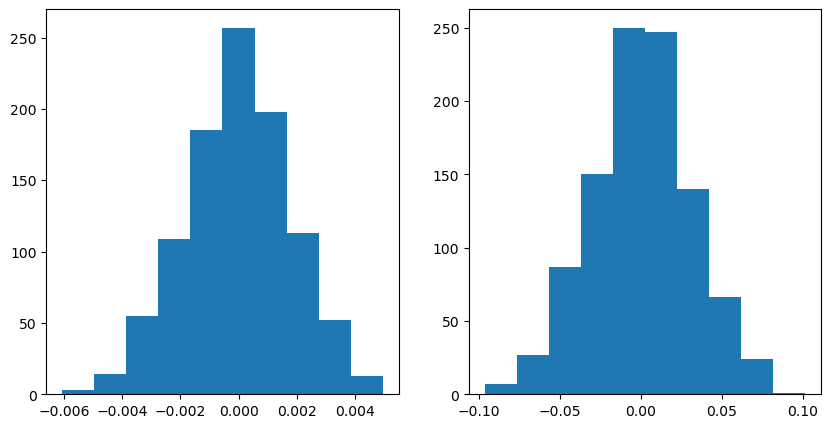

In [ ]:
# median h2
rng = np.random.default_rng(42)

func = lambda x: np.median(x)

euro_cont_shared_h2 = func(euro_cont['shared_h2'])
euro_cont_specific_h2 = func(euro_cont['specific_h2'])
euro_case_shared_h2 = func(euro_case['shared_h2'])
euro_case_specific_h2 = func(euro_case['specific_h2'])
asia_case_shared_h2 = func(asia_case['shared_h2'])
asia_case_specific_h2 = func(asia_case['specific_h2'])
meta_shared_h2 = func(meta['shared_h2'])
meta_specific_h2 = func(meta['specific_h2'])
print(meta.shape[0], meta_shared_h2, meta_specific_h2, meta_shared_h2 + meta_specific_h2, meta_specific_h2 / (meta_shared_h2 + meta_specific_h2))

## meta filter bio_var
# tmp_meta = meta.loc[(meta['g'] + meta['e']) > 0]
# tmp_meta_shared_h2 = func(tmp_meta['shared_h2'])
# tmp_meta_specific_h2 = func(tmp_meta['specific_h2'])
# print(tmp_meta.shape[0], tmp_meta_shared_h2, tmp_meta_specific_h2, tmp_meta_shared_h2 + tmp_meta_specific_h2, 
#       tmp_meta_specific_h2 / (tmp_meta_shared_h2 + tmp_meta_specific_h2))

## Perez vs CLUES: h2 and specificity
tmp_meta = meta.merge(yazar)
print(tmp_meta.shape)
tmp_rng = np.random.default_rng(43)
k = 999

def cal_specific_prop(shared, specific): 
    shared_median = np.median(shared)
    specific_median = np.median(specific)
    median = shared_median + specific_median

    return specific_median / median

perez_h2 = np.median(tmp_meta['shared_h2']) + np.median(tmp_meta['specific_h2'])
yazar_h2 = np.median(tmp_meta['yazar_shared_h2']) + np.median(tmp_meta['yazar_specific_h2'])
h2_diff = perez_h2 - yazar_h2
print('Perez:', perez_h2, 'Yazar:', yazar_h2, 'Diff h2:', h2_diff)

perez_prop = cal_specific_prop(tmp_meta['shared_h2'], tmp_meta['specific_h2'])
yazar_prop = cal_specific_prop(tmp_meta['yazar_shared_h2'], tmp_meta['yazar_specific_h2'])
prop_diff = perez_prop - yazar_prop
print('Perez:', perez_prop, 'Yazar:', yazar_prop, 'Diff specificity:', prop_diff)

h2_diffs = []
prop_diffs = []

for i in range(k):
    # permute perez with yazar
    swap_mask = rng.choice([True, False], size=tmp_meta.shape[0])
    tmp_meta_perm = tmp_meta.copy()
    tmp_meta_perm.loc[swap_mask, ['shared_h2', 'specific_h2', 'yazar_shared_h2', 'yazar_specific_h2']] = tmp_meta_perm.loc[swap_mask, ['yazar_shared_h2', 'yazar_specific_h2', 'shared_h2', 'specific_h2']].values
    # h2
    perez_h2 = np.median(tmp_meta_perm['shared_h2']) + np.median(tmp_meta_perm['specific_h2'])
    yazar_h2 = np.median(tmp_meta_perm['yazar_shared_h2']) + np.median(tmp_meta_perm['yazar_specific_h2'])
    h2_diffs.append(perez_h2 - yazar_h2)
    # specificity
    perez_prop = cal_specific_prop(tmp_meta_perm['shared_h2'], tmp_meta_perm['specific_h2'])
    yazar_prop = cal_specific_prop(tmp_meta_perm['yazar_shared_h2'], tmp_meta_perm['yazar_specific_h2'])
    prop_diffs.append(perez_prop - yazar_prop)

h2_diffs = np.array(h2_diffs)
p = (1 + (h2_diffs > h2_diff).sum()) / (k + 1)
print('Permutation h2 p:', p)
prop_diffs = np.array(prop_diffs)
p = (1 + (prop_diffs > prop_diff).sum()) / (k + 1)
print('Permutation specificity p:', p)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(h2_diffs)
axes[1].hist(prop_diffs)


euro_cont_shared_h2_ci = stats.bootstrap((euro_cont['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
euro_cont_specific_h2_ci = stats.bootstrap((euro_cont['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
euro_case_shared_h2_ci = stats.bootstrap((euro_case['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
euro_case_specific_h2_ci = stats.bootstrap((euro_case['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
asia_case_shared_h2_ci = stats.bootstrap((asia_case['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
asia_case_specific_h2_ci = stats.bootstrap((asia_case['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
meta_shared_h2_ci = stats.bootstrap((meta['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
meta_specific_h2_ci = stats.bootstrap((meta['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval



(10321, 28)
(2328, 28) (2325, 3) 2310 2324 1300
Number of genes: 10553
Cut: 4.73798919738463e-06
Number of sig genes: (4, 17) (1918, 17)
(9888, 29)


[2025-03-30 17:04:44 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:44 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Sig yazar genes: 183; perez < 0.05: 36
Binomial test: BinomTestResult(k=36, n=183, alternative='greater', statistic=0.19672131147540983, pvalue=1.8386029111840307e-12)
NotSig yazar genes: 9705; perez < 0.05: 57
Binomial test: BinomTestResult(k=57, n=9705, alternative='greater', statistic=0.005873261205564142, pvalue=1.0)
(1300, 3)
Mega regression:
 const                      0.010777
combined_connected_rank    0.003726
dtype: float64
2.5613390851239384
TtestResult(statistic=np.float64(4.124383498091201), pvalue=np.float64(3.9535934052520795e-05), df=np.float64(1298.0))


[2025-03-30 17:04:45 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:45 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:45 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:45 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:45 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

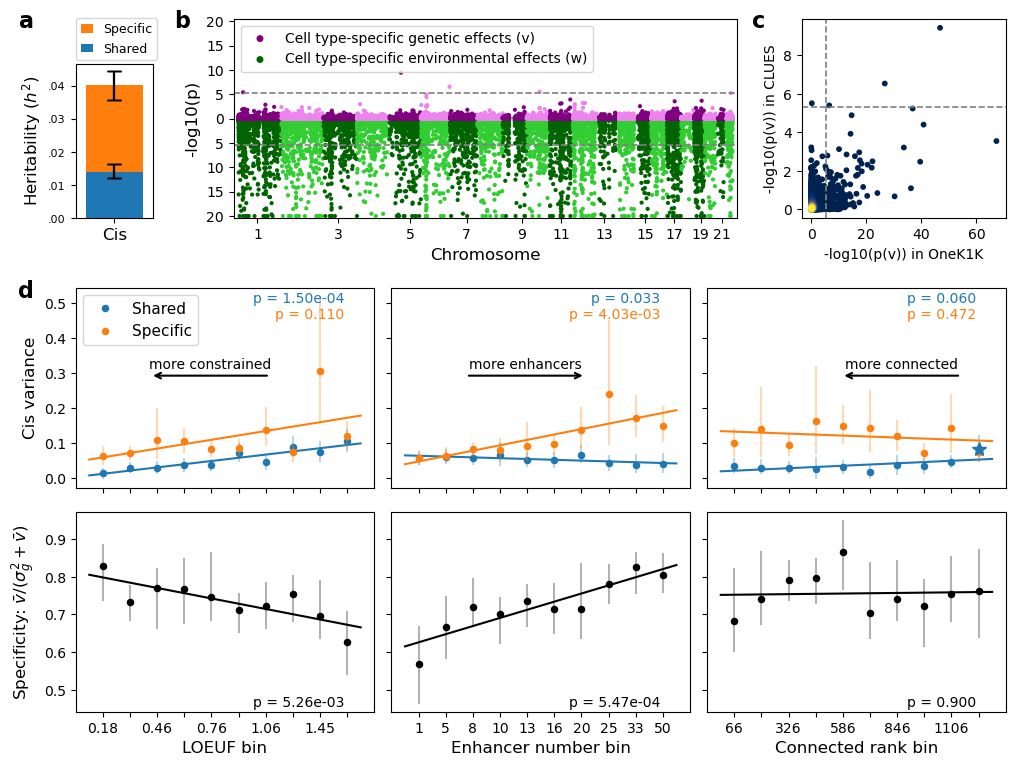

In [6]:
# plot
# filter s.e.(specificity)
print(gf.shape)
genes = euro_cont.loc[(euro_cont['std_specificity'] < 100) & (euro_case['std_specificity'] < 100) & (asia_case['std_specificity'] < 100) & (meta['g'] > 0), 'gene']
gf_data = gf.loc[gf['gene'].isin(genes), :].copy()
# rerank connectness
gf_data['combined_connected_rank'] = gf_data['combined_connected_rank'].rank(method='first')

annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
print(gf_data.shape, gf_data[annotations].dropna(how='all').shape, (~gf_data['LOEUF'].isna()).sum(), 
      (~gf_data['ActivityLinking_EnhancerNumber'].isna()).sum(), (~gf_data['combined_connected_rank'].isna()).sum())

colors = sns.color_palette()
fs = 12
lw = 1.5
alpha = 0.3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

fig = plt.figure(1, figsize=(12, 9))
gs = gridspec.GridSpec(31, 59, wspace=0.1, hspace=.1)

# cis h2
ax = fig.add_subplot(gs[2:9, :5])

labels = 'Cis'
bottom = np.zeros(len(labels))
values = np.array([meta_shared_h2])
ci = np.array([meta_shared_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, yerr=yerr.T, capsize=5,
    bottom=bottom, color=colors[0], edgecolor='none', label='Shared')

bottom += values
values = np.array([meta_specific_h2])
ci = np.array([meta_specific_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, yerr=yerr.T, capsize=5,
        bottom=bottom, color=colors[1], edgecolor='none', label='Specific')
ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
ax.set_yticklabels(['.00', '.01', '.02', '.03', '.04'], fontsize=fs-4)
ax.legend(loc=(-.0, 1.02), reverse=True, fontsize=fs-3, handlelength=1)
ax.set_ylabel('Heritability ($h^2$)', fontsize=fs)
xlims = ax.get_xlim()
ax.set_xlim((xlims[0] - 0.1, xlims[1] + 0.1))
ax.tick_params('x', labelsize=fs)

# ax.text(-0.3, 1.3, 'a', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(.09, .89, 'a', fontsize=fs + 4, fontweight='bold', va='top', ha='right')


# V & W
ax = fig.add_subplot(gs[:9, 10:42])
light_dark_green = mcolors.ListedColormap(['violet', 'purple'])
light_dark_blue = mcolors.ListedColormap(['limegreen', 'darkgreen'])
cut = -np.log10(0.05 / meta.shape[0])
v = 'p_V'
w = 'p_W'
print('Number of genes:', meta.shape[0])
print('Cut:', 0.05 / meta.shape[0])
print('Number of sig genes:', meta.loc[meta[v] > cut, :].shape, meta.loc[meta[w] > cut, :].shape)
meta[w + '_clip'] = meta[w].clip(lower=np.nan, upper=20)
ax.scatter(meta['start_cum'], -meta[w + '_clip'], c=meta['chr'] % 2, cmap=light_dark_blue, s=4, label='Cell type-specific environmental effects (w)')
ax.scatter(meta['start_cum'], meta[v], c=meta['chr'] % 2, cmap=light_dark_green, s=4, label='Cell type-specific genetic effects (v)')
ax.set_xticks(chr_ticks[::2])
ax.set_xticklabels(meta['chr'].unique()[::2])
ax.set_xlabel('Chromosome', fontsize=fs)
ax.set_ylabel('-log10(p)', fontsize=fs)
# yticks = ax.get_yticks()
# ytick_labels = [f"{abs(int(tick))}" for tick in yticks]
yticks = range(-20, 21, 5)
ytick_labels = [f"{abs(tick)}" for tick in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
ax.axhline(cut, color='0.5', lw=1.2, ls='--')
ax.axhline(-cut, color='0.5', lw=1.2, ls='--')
ax.set_xlim(- meta['start_cum'].max() * 0.01, meta['start_cum'].max() * (1 + 0.01))
ax.set_ylim(-20.5, 20.5)
ax.legend(markerscale=2, loc='upper left', fontsize=fs-2, reverse=True)

# ax.text(-0.07, 1.04, 'b', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(.22, .89, 'b', fontsize=fs + 4, fontweight='bold', va='top', ha='right')


# Perez vs Yazar
ax = fig.add_subplot(gs[:9, 46:])
tmp = meta.merge(yazar)
print(tmp.shape)
plot.scatter(tmp['p_yazar_V'], tmp['p_V'], ax=ax, color='0.5', s=10, heatscatter=True)
p_cut = -np.log10(0.05 / meta.shape[0])
ax.axhline(p_cut, color='0.5', lw=1.2, ls='--')
ax.axvline(p_cut, color='0.5', lw=1.2, ls='--')
ax.set_xlabel('-log10(p(v)) in OneK1K')
ax.set_ylabel('-log10(p(v)) in CLUES')

# ax.text(-0.07, 1.04, 'c', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(.7, .89, 'c', fontsize=fs + 4, fontweight='bold', va='top', ha='right')
# test for overlapping between yazar and perez signals
tmp_yazar_sig = tmp.loc[tmp['p_yazar_V'] > -np.log10(0.05 / tmp.shape[0])]
tmp_yazar_perez_sig = tmp_yazar_sig[tmp_yazar_sig["p_V"] > -np.log10(0.05)]
print(f'Sig yazar genes: {tmp_yazar_sig.shape[0]}; perez < 0.05: {tmp_yazar_perez_sig.shape[0]}')
print('Binomial test:', stats.binomtest(tmp_yazar_perez_sig.shape[0], tmp_yazar_sig.shape[0], 0.05, alternative='greater'))
tmp_yazar_notsig = tmp.loc[tmp['p_yazar_V'] < -np.log10(0.05 / tmp.shape[0])]
tmp_yazar_notsig_perez_sig = tmp_yazar_notsig[tmp_yazar_notsig["p_V"] > -np.log10(0.05)]
print(f'NotSig yazar genes: {tmp_yazar_notsig.shape[0]}; perez < 0.05: {tmp_yazar_notsig_perez_sig.shape[0]}')
print('Binomial test:', stats.binomtest(tmp_yazar_notsig_perez_sig.shape[0], tmp_yazar_notsig.shape[0], 0.05, alternative='greater'))

# permutation test: Perez more specific than Yazar



# gene feature
### divide gene annotation into bins
for annotation in annotations:
    gf_data = plot.bin_gene_annotation(gf_data, annotation, 10)

# mega regression for combined connectivity
connectivity_data = gf_data[['hom_g2', 'combined_connected_rank', 'combined_connected_rank_bin']].dropna()
print(connectivity_data.shape)
X = sm.add_constant(connectivity_data['combined_connected_rank'])
model = sm.OLS(connectivity_data['hom_g2'], X).fit()
# print(model.summary())
print('Mega regression:\n', model.pvalues)

# t test
least_connected_bin = connectivity_data['combined_connected_rank_bin'].max()
least_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] == least_connected_bin]
other_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] != least_connected_bin]
print(least_connected['hom_g2'].mean() / other_connected['hom_g2'].mean())
print(stats.ttest_ind(least_connected['hom_g2'], other_connected['hom_g2']))


ax11 = fig.add_subplot(gs[12:21, :19])
ax12 = fig.add_subplot(gs[12:21, 20:39], sharey=ax11)
ax13 = fig.add_subplot(gs[12:21, 40:], sharey=ax11)
ax21 = fig.add_subplot(gs[22:, :19], sharex=ax11)
ax22 = fig.add_subplot(gs[22:, 20:39], sharex=ax12, sharey=ax21)
ax23 = fig.add_subplot(gs[22:, 40:], sharex=ax13, sharey=ax21)
axes = np.array([[ax11, ax12, ax13],
                [ax21, ax22, ax23]])


for j, annotation in enumerate(annotations):
    grouped = gf_data.groupby(annotation + '_bin', observed=True)

    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)

    ax = axes[0, j]

    sns.pointplot(data=gf_data, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5}, 
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    
    sns.pointplot(data=gf_data, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5}, 
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)

    # add p values
    x = 0.9
    y = 0.98
    ax.text(x, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='top', transform=ax.transAxes)
    y -= .08
    ax.text(x, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='top', transform=ax.transAxes)


    ax2 = axes[1, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)
    sns.pointplot(data=gf_data, x=annotation + '_bin', y='specificity', estimator='median',
                markers='.', linestyles='none', color='k', err_kws={'alpha': alpha, 'linewidth': 1.5}, ax=ax2)
    xs = np.array(ax2.get_xlim())
    ax2.plot(xs, slope * xs + intercept, color='k', lw=lw, linestyle='-')

    ax2.text(x, 0.01, f'p = {format_p(p)}', fontsize=fs-2, color='k', ha='right', va='bottom', transform=ax2.transAxes)

    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'

    if annotation in ['LOEUF', 'EDS', 'combined_connected_rank']:
        # set x tick labels
        xticklabels = []
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % 2 == 0:
                xticklabels.append(label.get_text())
            else:
                xticklabels.append('')
        ax2.set_xticks(ax2.get_xticks())
        ax2.set_xticklabels(xticklabels)

    ax2.set_xlabel(xlabel, fontsize=fs)

    if j == 0:
        ax.set_ylabel('Cis variance', fontsize=fs)
        ax2.set_ylabel('Specificity: ' + r'$\bar{v}/(\sigma_g^2 + \bar{v})$', fontsize=fs)
    else:
        ax.tick_params(axis='y', labelleft=False)
        ax2.tick_params(axis='y', labelleft=False)
        ax.set_ylabel('')
        ax2.set_ylabel('')
    
    if j != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(fontsize=fs-1)

# add arrow
x, y = 0.65, 0.56
length = 0.4
arrow_position = (x, y)
axes[0, 0].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=(arrow_position[0], arrow_position[1]),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(x - length / 2, y + .02, 'more constrained', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 0].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0], arrow_position[1]), xytext=(arrow_position[0] - length, arrow_position[1]),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(x - length / 2, y + .02, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 1].transAxes)

x2 = x + 0.2
axes[0, 2].annotate('', xy=(x2 - length, arrow_position[1]), xytext=(x2, arrow_position[1]),
        arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
        fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 2].transAxes)
axes[0, 2].text(x2 - length / 2, y + .02, 'more connected', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 2].transAxes)


# add a star to connectedness vs shared
axes[0, 2].plot(9, gf_data.loc[gf_data['combined_connected_rank_bin'] == gf_data['combined_connected_rank_bin'].max(), 'hom_g2'].mean(), marker='*', color=colors[0], markersize=10, zorder=10)

# axes[0, 0].text(-0.12, 1.04, 'd', transform=axes[0, 0].transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
fig.text(.09, .59, 'd', fontsize=fs + 4, fontweight='bold', va='top', ha='right')

fig.tight_layout()


# validation

[2025-03-30 17:04:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


(10321, 28)
(3078, 28) (3075, 3) 3056 3073 1724
(3056, 3)
Mega regression:
 const    0.521487
LOEUF    0.676229
dtype: float64
(1724, 3)
Mega regression:
 const                      0.006411
combined_connected_rank    0.000109
dtype: float64
2.590915219793892
TtestResult(statistic=np.float64(5.037326761431793), pvalue=np.float64(5.216091825291872e-07), df=np.float64(1722.0))


[2025-03-30 17:04:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:48 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:48 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:48 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:04:48 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

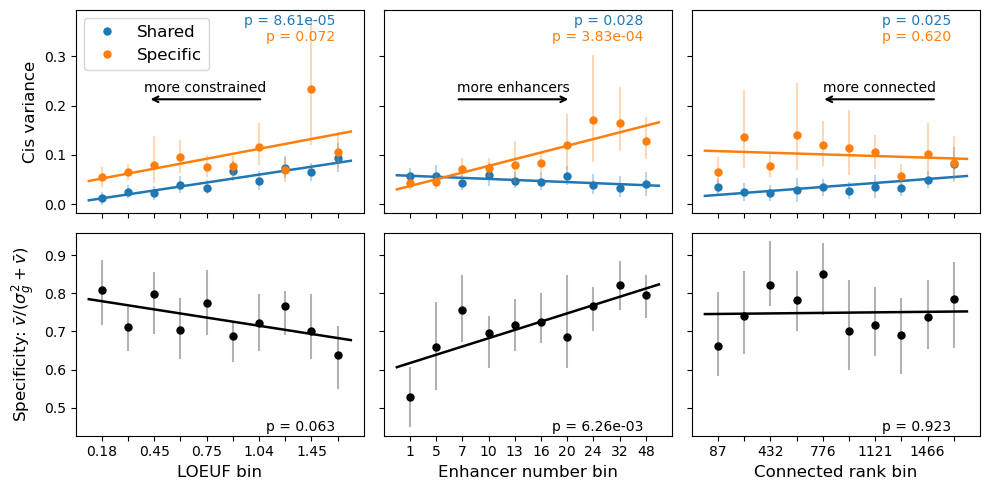

In [7]:
# plot
# filter s.e.(specificity)
print(gf.shape)
genes_val = euro_cont.loc[(meta['g'] > 0), 'gene']
gf_data_val = gf.loc[gf['gene'].isin(genes_val), :].copy()
# rerank connectness
gf_data_val['combined_connected_rank'] = gf_data_val['combined_connected_rank'].rank(method='first')

annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
print(gf_data_val.shape, gf_data_val[annotations].dropna(how='all').shape, (~gf_data_val['LOEUF'].isna()).sum(), 
      (~gf_data_val['ActivityLinking_EnhancerNumber'].isna()).sum(), (~gf_data_val['combined_connected_rank'].isna()).sum())

colors = sns.color_palette()
fs = 12
lw = 1.8
s = 8
alpha = 0.3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 5), sharex='col', sharey='row')

### divide gene annotation into bins
for annotation in annotations:
    gf_data_val = plot.bin_gene_annotation(gf_data_val, annotation, 10)

# mega regression for LOEUF
LOEUF_data_val = gf_data_val[['specificity', 'LOEUF', 'LOEUF_bin']].dropna()
print(LOEUF_data_val.shape)
X = sm.add_constant(LOEUF_data_val['LOEUF'])
model = sm.OLS(LOEUF_data_val['specificity'], X).fit()
# print(model.summary())
print('Mega regression:\n', model.pvalues)

# mega regression for combined connectivity
connectivity_data_val = gf_data_val[['hom_g2', 'combined_connected_rank', 'combined_connected_rank_bin']].dropna()
print(connectivity_data_val.shape)
X = sm.add_constant(connectivity_data_val['combined_connected_rank'])
model = sm.OLS(connectivity_data_val['hom_g2'], X).fit()
# print(model.summary())
print('Mega regression:\n', model.pvalues)

# t test
least_connected_bin = connectivity_data_val['combined_connected_rank_bin'].max()
least_connected = connectivity_data_val.loc[connectivity_data_val['combined_connected_rank_bin'] == least_connected_bin]
other_connected = connectivity_data_val.loc[connectivity_data_val['combined_connected_rank_bin'] != least_connected_bin]
print(least_connected['hom_g2'].mean() / other_connected['hom_g2'].mean())
print(stats.ttest_ind(least_connected['hom_g2'], other_connected['hom_g2']))


for j, annotation in enumerate(annotations):
    grouped = gf_data_val.groupby(annotation + '_bin', observed=True)

    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)

    ax = axes[0, j]

    sns.pointplot(data=gf_data_val, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', markersize=s, linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5}, 
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')
    
    sns.pointplot(data=gf_data_val, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', markersize=s, linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5}, 
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)

    # add p values
    x = 0.9
    y = 0.98
    ax.text(x, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='top', transform=ax.transAxes)
    y -= .08
    ax.text(x, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='top', transform=ax.transAxes)


    ax2 = axes[1, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)
    sns.pointplot(data=gf_data_val, x=annotation + '_bin', y='specificity', estimator='median',
                markers='.', markersize=s, linestyles='none', color='k', err_kws={'alpha': alpha, 'linewidth': 1.5}, ax=ax2)
    xs = np.array(ax2.get_xlim())
    ax2.plot(xs, slope * xs + intercept, color='k', lw=lw, linestyle='-')

    ax2.text(x, 0.01, f'p = {format_p(p)}', fontsize=fs-2, color='k', ha='right', va='bottom', transform=ax2.transAxes)

    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'

    if annotation in ['LOEUF', 'EDS', 'combined_connected_rank']:
        # set x tick labels
        xticklabels = []
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % 2 == 0:
                xticklabels.append(label.get_text())
            else:
                xticklabels.append('')
        ax2.set_xticks(ax2.get_xticks())
        ax2.set_xticklabels(xticklabels)

    ax2.set_xlabel(xlabel, fontsize=fs)

    if j == 0:
        ax.set_ylabel('Cis variance', fontsize=fs)
        ax2.set_ylabel('Specificity: ' + r'$\bar{v}/(\sigma_g^2 + \bar{v})$', fontsize=fs)
    else:
        ax.tick_params(axis='y', labelleft=False)
        ax2.tick_params(axis='y', labelleft=False)
        ax.set_ylabel('')
        ax2.set_ylabel('')
    
    if j != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(fontsize=fs)

# add arrow
x, y = 0.65, 0.56
length = 0.4
arrow_position = (x, y)
axes[0, 0].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=(arrow_position[0], arrow_position[1]),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(x - length / 2, y + .02, 'more constrained', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 0].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0], arrow_position[1]), xytext=(arrow_position[0] - length, arrow_position[1]),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(x - length / 2, y + .02, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 1].transAxes)

x2 = x + 0.2
axes[0, 2].annotate('', xy=(x2 - length, arrow_position[1]), xytext=(x2, arrow_position[1]),
        arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
        fontsize=fs-2, ha='center', va='center', xycoords=axes[0, 2].transAxes)
axes[0, 2].text(x2 - length / 2, y + .02, 'more connected', ha='center', va='bottom', 
                fontsize=fs-2, transform=axes[0, 2].transAxes)


# add a star to connectedness vs shared
# axes[0, 2].plot(9, gf_data_val.loc[gf_data_val['combined_connected_rank_bin'] == gf_data_val['combined_connected_rank_bin'].max(), 'hom_g2'].mean(), 
                # marker='*', color=colors[0], markersize=10, zorder=10)

fig.tight_layout()


# Comparison between dataset, populations and case vs control

(10553, 25)
Index(['gene', 'hom_g2_x', 'hom_e2_x', 'V_x', 'W_x', 'shared_h2_x',
       'specific_h2_x', 'p_V_x', 'p_W_x', 'std_specificity_x', 'g_x', 'e_x',
       'specificity_x', 'hom_g2_y', 'hom_e2_y', 'V_y', 'W_y', 'shared_h2_y',
       'specific_h2_y', 'p_V_y', 'p_W_y', 'std_specificity_y', 'g_y', 'e_y',
       'specificity_y'],
      dtype='object')
total genetic variance: PearsonRResult(statistic=np.float64(0.11527453497980118), pvalue=np.float64(1.5015722855817127e-32))
shared gen variance: PearsonRResult(statistic=np.float64(0.0858990451433899), pvalue=np.float64(9.613453268125198e-19))
specific genetic: PearsonRResult(statistic=np.float64(0.09123030407742583), pvalue=np.float64(5.979291479009775e-21))
total env: PearsonRResult(statistic=np.float64(0.43770167981929564), pvalue=np.float64(0.0))
shared env: PearsonRResult(statistic=np.float64(0.01650801058440322), pvalue=np.float64(0.08993395598648715))
specific env: PearsonRResult(statistic=np.float64(0.4329934551172621), pvalu

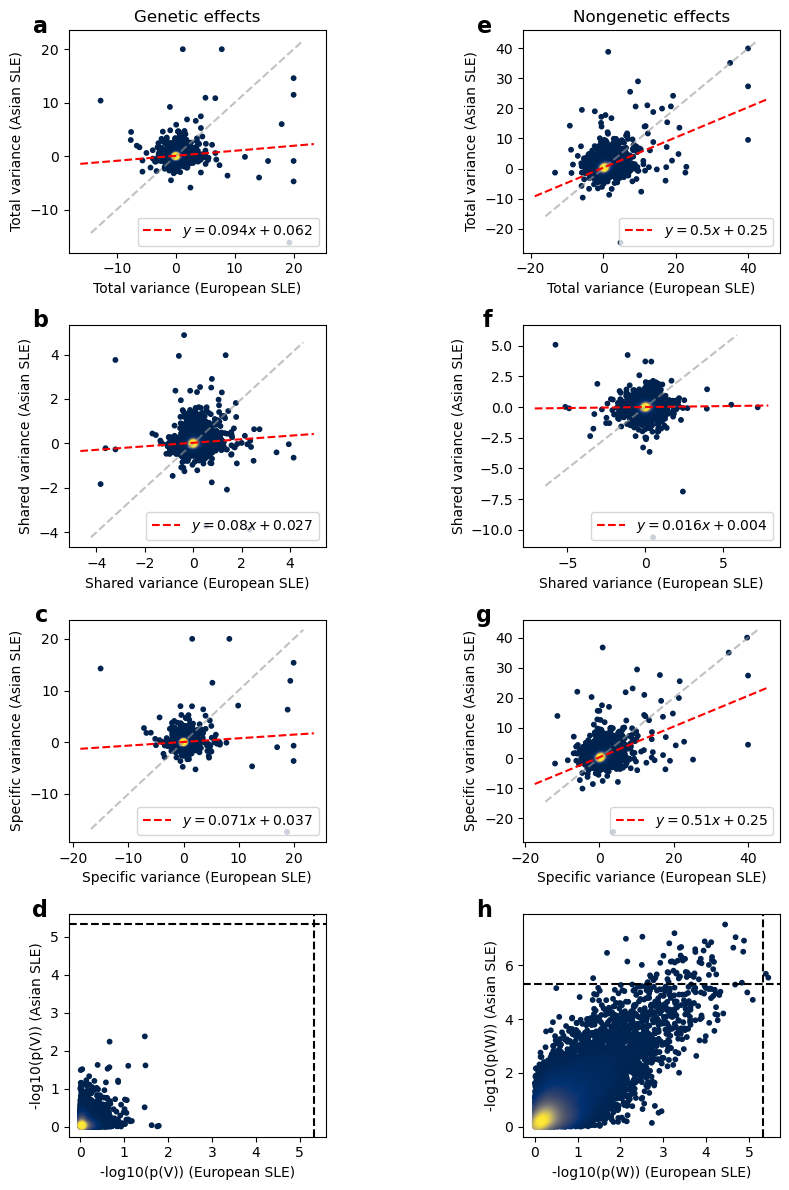

In [8]:
# Euro vs Asia
tmp = euro_case.merge(asia_case, on='gene')
print(tmp.shape)
print(tmp.columns)

fs = 12
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

ax = axes[0, 0]
x = tmp['g_x']
y = tmp['g_y']
print('total genetic variance:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 20), y.clip(np.nan, 20), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Total variance (European SLE)', ylab='Total variance (Asian SLE)')
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, 1.07, 'a', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Genetic effects')

ax = axes[1, 0]
x = tmp['hom_g2_x']
y = tmp['hom_g2_y']
print('shared gen variance:', stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=10, heatscatter=True, xlab='Shared variance (European SLE)', ylab='Shared variance (Asian SLE)')
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, 1.07, 'b', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 0]
x = tmp['V_x']
y = tmp['V_y']
print('specific genetic:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 20), y.clip(np.nan, 20), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Specific variance (European SLE)', ylab='Specific variance (Asian SLE)')
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
xlim = np.array(ax.get_xlim())
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, 1.07, 'c', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 0]
plot.scatter(tmp['p_V_x'], tmp['p_V_y'], ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(V)) (European SLE)', ylab='-log10(p(V)) (Asian SLE)')
ax.text(-0.08, 1.07, 'd', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
p_cut = -np.log10(0.05 / tmp.shape[0])
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

ax = axes[0, 1]
x = tmp['e_x']
y = tmp['e_y']
print('total env:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 40), y.clip(np.nan, 40), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Total variance (European SLE)', ylab='Total variance (Asian SLE)')
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, 1.07, 'e', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Nongenetic effects')

ax = axes[1, 1]
x = tmp['hom_e2_x']
y = tmp['hom_e2_y']
print('shared env:', stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=10, heatscatter=True, xlab='Shared variance (European SLE)', ylab='Shared variance (Asian SLE)', )
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, 1.07, 'f', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 1]
x = tmp['W_x']
y = tmp['W_y']
print('specific env:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 40), y.clip(np.nan, 40), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Specific variance (European SLE)', ylab='Specific variance (Asian SLE)', )
plot.yxline(ax=ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, 1.07, 'g', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 1]
plot.scatter(tmp['p_W_x'], tmp['p_W_y'], ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(W)) (European SLE)', ylab='-log10(p(W)) (Asian SLE)')
ax.text(-0.12, 1.07, 'h', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

fig.tight_layout(w_pad = 10)

(10553, 25)
Index(['gene', 'hom_g2_x', 'hom_e2_x', 'V_x', 'W_x', 'shared_h2_x',
       'specific_h2_x', 'p_V_x', 'p_W_x', 'std_specificity_x', 'g_x', 'e_x',
       'specificity_x', 'hom_g2_y', 'hom_e2_y', 'V_y', 'W_y', 'shared_h2_y',
       'specific_h2_y', 'p_V_y', 'p_W_y', 'std_specificity_y', 'g_y', 'e_y',
       'specificity_y'],
      dtype='object')
total genetic: PearsonRResult(statistic=np.float64(0.4343250054937279), pvalue=np.float64(0.0))
shared genetic: PearsonRResult(statistic=np.float64(0.2047277081800185), pvalue=np.float64(3.012531446340983e-100))
specific genetic: PearsonRResult(statistic=np.float64(0.40876384538821037), pvalue=np.float64(0.0))
total env: PearsonRResult(statistic=np.float64(0.4829170092844085), pvalue=np.float64(0.0))
shared env: PearsonRResult(statistic=np.float64(0.09130917302567448), pvalue=np.float64(5.533767248855248e-21))
specific env: PearsonRResult(statistic=np.float64(0.48091488316593517), pvalue=np.float64(0.0))


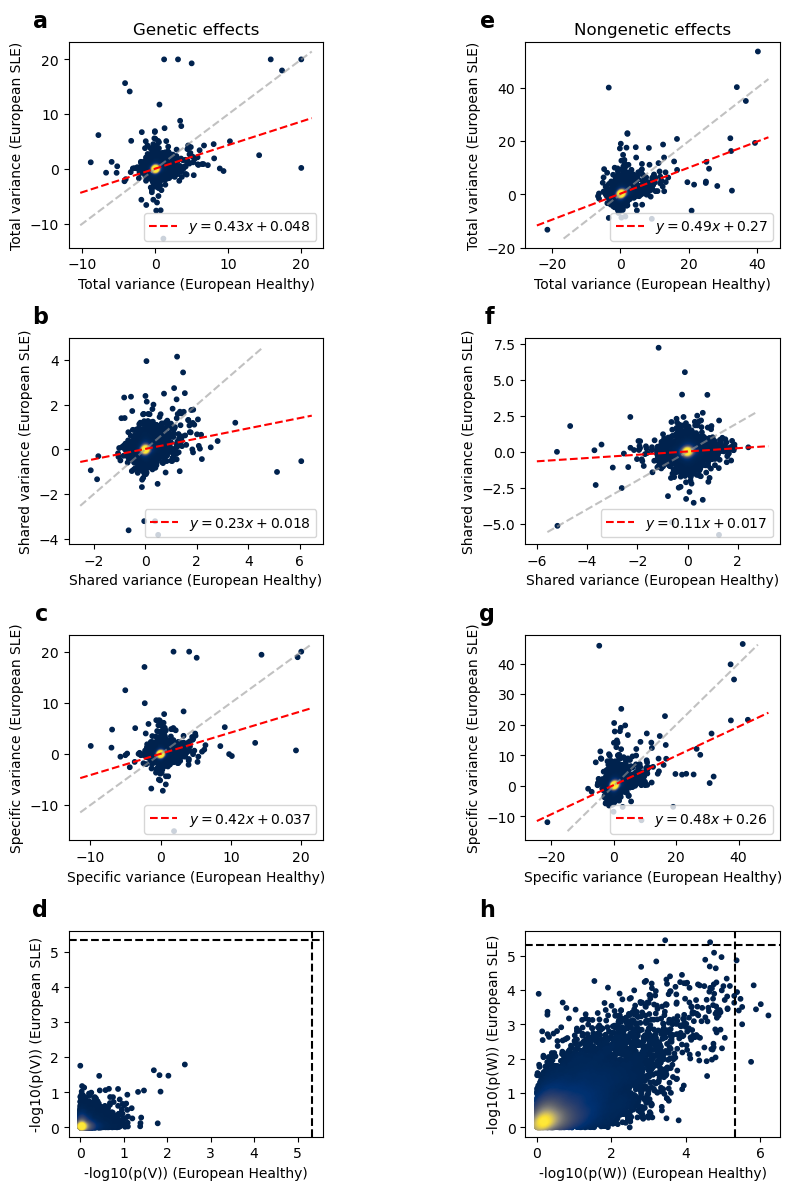

In [9]:
# Case vs Control
tmp = euro_cont.merge(euro_case, on='gene')
print(tmp.shape)
print(tmp.columns)

fs = 12
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
index_y = 1.16

ax = axes[0, 0]
x = tmp['g_x']
y = tmp['g_y']
print('total genetic:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 20), y.clip(np.nan, 20), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Total variance (European Healthy)', ylab='Total variance (European SLE)')
xlim = np.array(ax.get_xlim())
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, index_y, 'a', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Genetic effects')

ax = axes[1, 0]
x = tmp['hom_g2_x']
y = tmp['hom_g2_y']
print('shared genetic:', stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=10, heatscatter=True, xlab='Shared variance (European Healthy)', ylab='Shared variance (European SLE)')
xlim = np.array(ax.get_xlim())
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, index_y, 'b', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 0]
x = tmp['V_x']
y = tmp['V_y']
print('specific genetic:', stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 20), y.clip(np.nan, 20), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Specific variance (European Healthy)', ylab='Specific variance (European SLE)')
xlim = np.array(ax.get_xlim())
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.08, index_y, 'c', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 0]
plot.scatter(tmp['p_V_x'], tmp['p_V_y'], ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(V)) (European Healthy)', ylab='-log10(p(V)) (European SLE)')
ax.text(-0.08, index_y, 'd', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
p_cut = -np.log10(0.05 / tmp.shape[0])
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

ax = axes[0, 1]
x = tmp['e_x']
y = tmp['e_y']
print('total env:', stats.pearsonr(x, y))
plot.scatter(x, y.clip(np.nan, np.nan), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Total variance (European Healthy)', ylab='Total variance (European SLE)')
xlim = np.array(ax.get_xlim())
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, index_y, 'e', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Nongenetic effects')

ax = axes[1, 1]
x = tmp['hom_e2_x']
y = tmp['hom_e2_y']
print('shared env:', stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=10, heatscatter=True, xlab='Shared variance (European Healthy)', ylab='Shared variance (European SLE)', )
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, index_y, 'f', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 1]
x = tmp['W_x']
y = tmp['W_y']
print('specific env:', stats.pearsonr(x, y))
plot.scatter(x, y.clip(np.nan, np.nan), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Specific variance (European Healthy)', ylab='Specific variance (European SLE)', )
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2g}x+{intercept:.2g}$' if intercept >= 0 else f'$y={slope:.2g}x{intercept:.2g}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right')
ax.text(-0.12, index_y, 'g', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 1]
plot.scatter(tmp['p_W_x'], tmp['p_W_y'], ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(W)) (European Healthy)', ylab='-log10(p(W)) (European SLE)')
ax.text(-0.12, index_y, 'h', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

fig.tight_layout(w_pad=10)

(9888, 29)
Index(['gene', 'hom_g2', 'hom_e2', 'V', 'W', 'shared_h2', 'specific_h2',
       'specificity', 'p_V', 'p_W', 'g', 'e', 'feature', 'GeneSymbol', 'chr',
       'start', 'start_cum', 'p_W_clip', 'yazar_hom_g2', 'yazar_hom_e2',
       'yazar_V', 'yazar_W', 'p_yazar_V', 'p_yazar_W', 'yazar_g', 'yazar_e',
       'yazar_specificity', 'yazar_shared_h2', 'yazar_specific_h2'],
      dtype='object')
PearsonRResult(statistic=np.float64(0.4343872655262266), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.5722287901759787), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.25655047667997116), pvalue=np.float64(2.1735337093907158e-148))
PearsonRResult(statistic=np.float64(0.2632086432219497), pvalue=np.float64(2.2849061721349353e-156))
PearsonRResult(statistic=np.float64(0.2544349769580686), pvalue=np.float64(6.6587380755414585e-146))
PearsonRResult(statistic=np.float64(0.2601454878821258), pvalue=np.float64(1.143818238765362e-152))


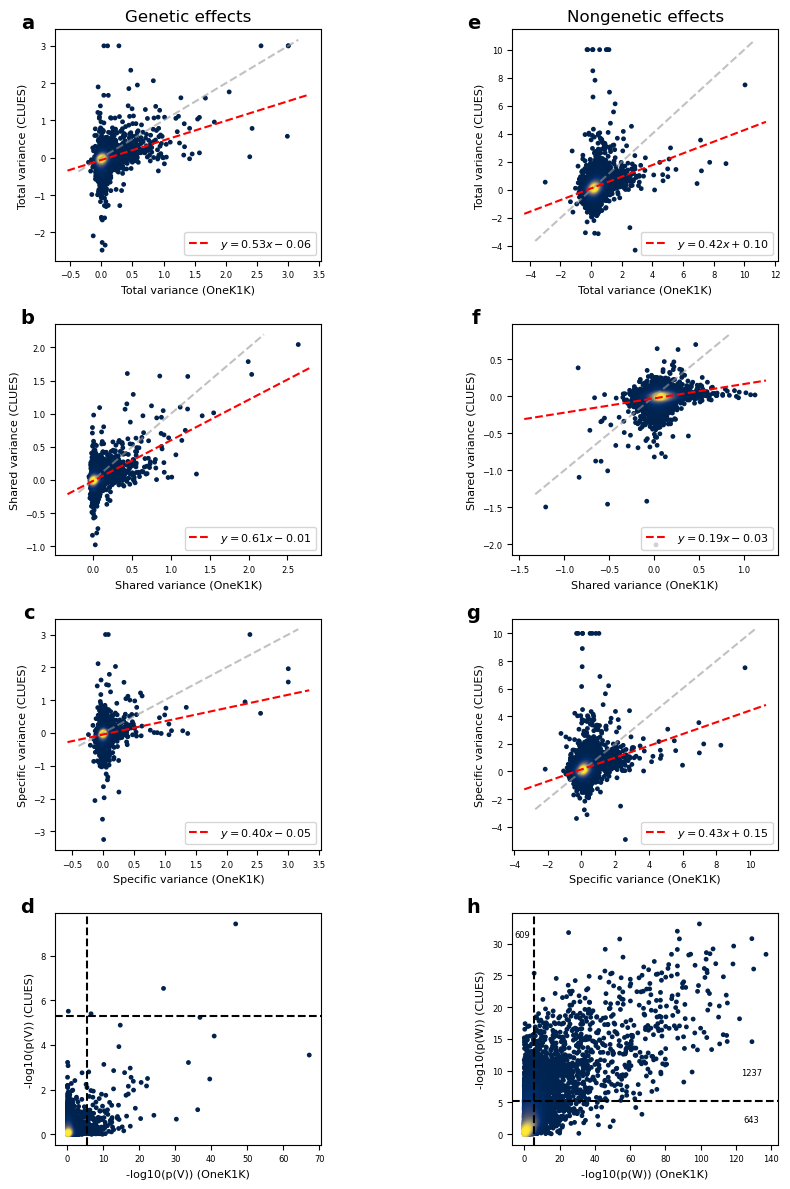

In [10]:
# Perez vs Yazar
tmp = meta.merge(yazar)
print(tmp.shape)
print(tmp.columns)

fs = 10
markersize = 6
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

ax = axes[0, 0]
x = tmp['yazar_g']
y = tmp['g']
print(stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 3), y.clip(np.nan, 3), ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Total variance (OneK1K)', fontsize=fs-2) 
ax.set_ylabel('Total variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.08, 1.07, 'a', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Genetic effects')

ax = axes[1, 0]
x = tmp['yazar_hom_g2']
y = tmp['hom_g2']
print(stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Shared variance (OneK1K)', fontsize=fs-2)
ax.set_ylabel('Shared variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.08, 1.07, 'b', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 0]
x = tmp['yazar_V']
y = tmp['V']
print(stats.pearsonr(x, y))
plot.scatter(x.clip(np.nan, 3), y.clip(np.nan, 3), ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Specific variance (OneK1K)', fontsize=fs-2)
ax.set_ylabel('Specific variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.08, 1.07, 'c', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 0]
plot.scatter(tmp['p_yazar_V'], tmp['p_V'], ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('-log10(p(V)) (OneK1K)', fontsize=fs-2)
ax.set_ylabel('-log10(p(V)) (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
ax.text(-0.08, 1.07, 'd', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
p_cut = -np.log10(0.05 / tmp.shape[0])
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

ax = axes[0, 1]
x = tmp['yazar_e']
y = tmp['e']
print(stats.pearsonr(x, y))
plot.scatter(x, y.clip(np.nan, 10), ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Total variance (OneK1K)', fontsize=fs-2)
ax.set_ylabel('Total variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.12, 1.07, 'e', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.set_title('Nongenetic effects')

ax = axes[1, 1]
x = tmp['yazar_hom_e2']
y = tmp['hom_e2']
print(stats.pearsonr(x, y))
plot.scatter(x, y, ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Shared variance (OneK1K)', fontsize=fs-2)
ax.set_ylabel('Shared variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.12, 1.07, 'f', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[2, 1]
x = tmp['yazar_W']
y = tmp['W']
print(stats.pearsonr(x, y))
plot.scatter(x, y.clip(np.nan, 10), ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('Specific variance (OneK1K)', fontsize=fs-2)
ax.set_ylabel('Specific variance (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
plot.yxline(ax, color='0.6', linestyle='--')
slope, intercept, _, _, _ = stats.linregress(x, y)
line = f'$y={slope:.2f}x+{intercept:.2f}$' if intercept >= 0 else f'$y={slope:.2f}x{intercept:.2f}$'
xlim = np.array(ax.get_xlim())
ax.plot(xlim, intercept + slope * xlim, 'r', linestyle='--', label=line, zorder=10)
ax.legend(loc='lower right', fontsize=fs-2)
ax.text(-0.12, 1.07, 'g', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

ax = axes[3, 1]
plot.scatter(tmp['p_yazar_W'], tmp['p_W'], ax=ax, color='0.5', s=markersize, heatscatter=True)
ax.set_xlabel('-log10(p(W)) (OneK1K)', fontsize=fs-2)
ax.set_ylabel('-log10(p(W)) (CLUES)', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-4)
ax.text(-0.12, 1.07, 'h', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')
ax.axhline(p_cut, color='k', linestyle='--')
ax.axvline(p_cut, color='k', linestyle='--')

ax.text(0.01, 0.9, f"{tmp.loc[(tmp['p_W'] > p_cut) & (tmp['p_yazar_W'] < p_cut)].shape[0]}", transform=ax.transAxes, ha='left', fontsize=fs-4)
ax.text(0.9, 0.3, f"{tmp.loc[(tmp['p_W'] > p_cut) & (tmp['p_yazar_W'] > p_cut)].shape[0]}", transform=ax.transAxes, ha='center', fontsize=fs-4)
ax.text(0.9, 0.1, f"{tmp.loc[(tmp['p_W'] < p_cut) & (tmp['p_yazar_W'] > p_cut)].shape[0]}", transform=ax.transAxes, ha='center', fontsize=fs-4)

# ax = axes[3, 0]
# plot.scatter(tmp['p_V'].clip(-100, 100), tmp['fisher_p_V'].clip(-100, 100), ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(V)) (Meta)', ylab='-log10(p(V)) (Fisher)', 
#              xyline=True, linregress=True, linregress_label=True, coeff_determination=True)
# # plot.scatter(tmp['yazar_specificity'].clip(-100, 100), tmp['specificity'].clip(-100, 100), ax=ax, color='0.5', s=10, heatscatter=True, xlab='Yazar specificity', ylab='Perez specificity', 
#             #  xyline=True, linregress=True, linregress_label=True, coeff_determination=True)
# ax = axes[3, 1]
# plot.scatter(tmp['p_W'].clip(-100, 100), tmp['fisher_p_W'].clip(-100, 100), ax=ax, color='0.5', s=10, heatscatter=True, xlab='-log10(p(W)) (Meta)', ylab='-log10(p(W)) (Fisher)', 
#              xyline=True, linregress=True, linregress_label=True, coeff_determination=True)

fig.tight_layout(w_pad=10)

# QQ plot

(10553, 18)


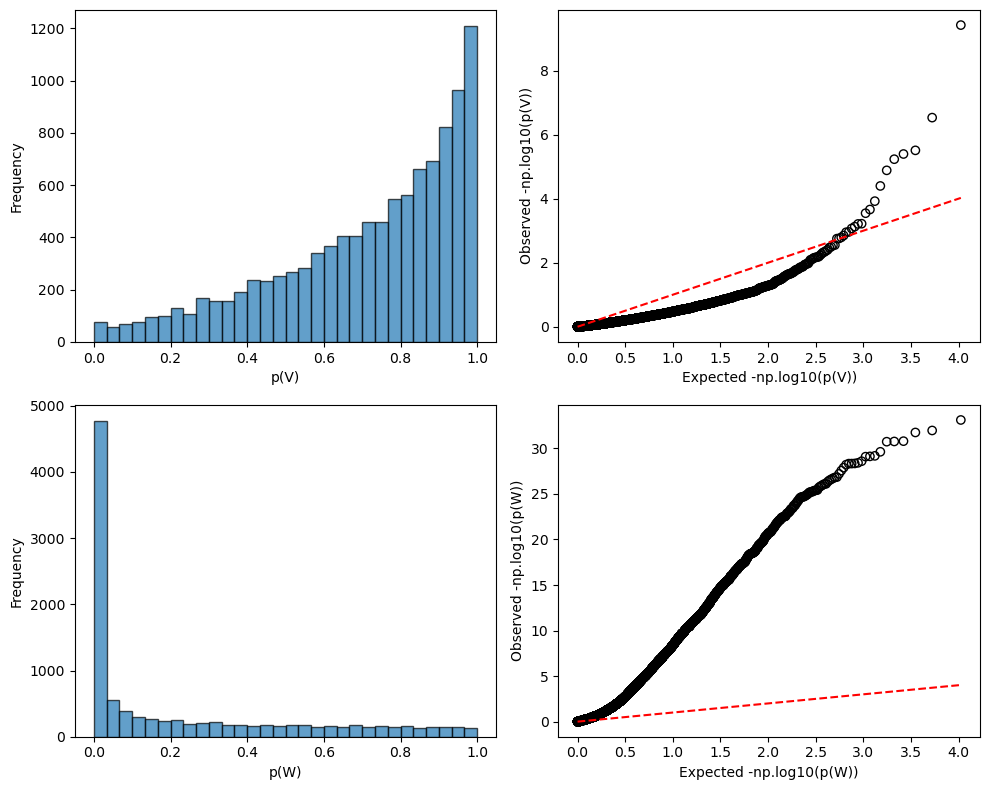

In [11]:
# Supp: QQ plot and hist
print(meta.shape)
p_values = 10 ** (-meta['p_V'])
W_p_values = 10 ** (-meta['p_W'])

# Sort p-values for QQ plot
sorted_p_values = np.sort(p_values)
sorted_W_p_values = np.sort(W_p_values)

# Theoretical quantiles
quantiles = np.arange(1, len(p_values)+1) / (len(p_values)+1)
W_quantiles = np.arange(1, len(W_p_values)+1) / (len(W_p_values)+1)

# QQ plot
plt.figure(figsize=(10, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(p_values, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('p(V)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.scatter(-np.log10(quantiles), -np.log10(sorted_p_values), edgecolor='k', facecolor='none')
x_max = np.max(-np.log10(quantiles))
plt.plot([0, x_max], [0, x_max], 'r--')
plt.xlabel('Expected -np.log10(p(V))')
plt.ylabel('Observed -np.log10(p(V))')

plt.subplot(2, 2, 3)
plt.hist(W_p_values, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('p(W)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.scatter(-np.log10(W_quantiles), -np.log10(sorted_W_p_values), edgecolor='k', facecolor='none')
x_max = np.max(-np.log10(W_quantiles))
plt.plot([0, x_max], [0, x_max], 'r--')
plt.xlabel('Expected -np.log10(p(W))')
plt.ylabel('Observed -np.log10(p(W))')

plt.tight_layout()
plt.show()

# Meta vs group analysis

Text(0, 0.5, 'Heritability (h2)')

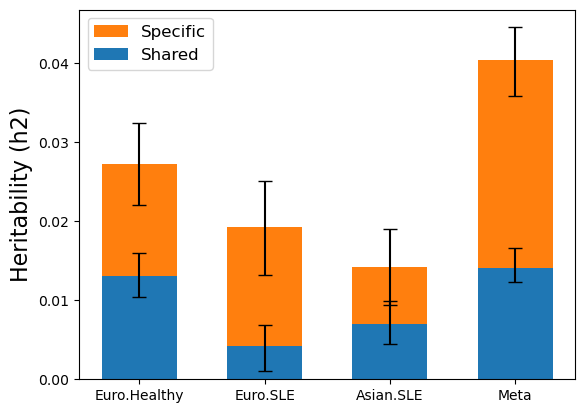

In [12]:
# plot
colors = sns.color_palette()

fig, ax = plt.subplots()
labels = ['Euro.Healthy', 'Euro.SLE', 'Asian.SLE', 'Meta']
width = .6

# cis
bottom = np.zeros(len(labels))
values = np.array([euro_cont_shared_h2, euro_case_shared_h2, asia_case_shared_h2, meta_shared_h2])
ci = np.array([euro_cont_shared_h2_ci, euro_case_shared_h2_ci, asia_case_shared_h2_ci, meta_shared_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
    bottom=bottom, color=colors[0], edgecolor='none', label='Shared')

bottom += values
values = np.array([euro_cont_specific_h2, euro_case_specific_h2, asia_case_specific_h2, meta_specific_h2])
ci = np.array([euro_cont_specific_h2_ci, euro_case_specific_h2_ci, asia_case_specific_h2_ci, meta_specific_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
        bottom=bottom, color=colors[1], edgecolor='none', label='Specific')
# ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
ax.legend(loc='upper left', reverse=True, fontsize=12)
ax.set_ylabel('Heritability (h2)', fontsize=16)
# ax.set_title('Cis', fontsize=20)

# print(cis_ctp_specific_h2 / (cis_ctp_specific_h2 + cis_ctp_shared_h2))
# print(cis_op_specific_h2 / (cis_op_specific_h2 + cis_op_shared_h2))

# Mega

In [13]:
# cis
mega_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/all.all/he.npy'

mega_out = np.load(mega_f, allow_pickle=True).item()

# make dataframe
mega_dict = {'gene': mega_out['gene'], 'hom_g2': mega_out['free']['hom_g2'], 'hom_e2': mega_out['free']['hom_e2'],
             'V': np.mean(np.diagonal(mega_out['free']['V'], axis1=1, axis2=2), axis=1), 
             'W': np.mean(np.diagonal(mega_out['free']['W'], axis1=1, axis2=2), axis=1), 
             'shared_h2': mega_out['free']['shared_h2'], 'specific_h2': mega_out['free']['specific_h2'], 
             'p_V': -np.log10(mega_out['p']['free']['V']), 'p_W': -np.log10(mega_out['p']['free']['W']),
             'std_specificity': np.sqrt(mega_out['p']['free']['var_specificity'])}
mega = pd.DataFrame(mega_dict)
# select genes
mega = mega.loc[mega['gene'].isin(meta['gene'])]
print(mega.shape)

mega['g'] = mega['V'] + mega['hom_g2']
mega['e'] = mega['W'] + mega['hom_e2']
mega['specificity'] = mega['V'] / meta['g']

# add position
gene_meta = pd.read_table('../../analysis/perez/data/all.all.gene_meta.txt', usecols=['feature', 'GeneSymbol', 'chr', 'start']).drop_duplicates()
mega = mega.merge(gene_meta, left_on='gene', right_on='feature').sort_values(['chr', 'start'])
mega, chr_ticks = cumulate_bp(mega)
print(mega.shape)

# gene features
eds_f = '../../analysis/perez/eds.txt'
mega_gf = pd.read_table(eds_f, sep='\t')

print(mega.shape)
mega_gf = mega.merge(mega_gf, left_on='gene', right_on='gene_id')
print(mega_gf.shape)

(10553, 10)
(10553, 18)
(10553, 18)
(10321, 34)


In [14]:
# h2
func = lambda x: np.median(x)
mega_shared_h2 = func(mega['shared_h2'])
mega_specific_h2 = func(mega['specific_h2'])
print(mega_shared_h2, mega_specific_h2, mega_shared_h2 + mega_specific_h2, mega_specific_h2 / (mega_shared_h2 + mega_specific_h2))

mega_shared_h2_ci = stats.bootstrap((mega['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
mega_specific_h2_ci = stats.bootstrap((mega['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval

0.006961153647814788 0.05395430232529641 0.060915455973111196 0.8857243447231599


(10321, 34)
(7554, 34) (7552, 3) 7502 7536 4200
Number of genes: (10553, 18)
Cut: 4.73798919738463e-06
Number of sig genes: (14, 18) (2494, 18)
(9888, 29)


[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


(4200, 3)
Mega regression:
 const                      9.491886e-01
combined_connected_rank    1.911437e-16
dtype: float64
3.1138918778154414
TtestResult(statistic=np.float64(7.414288230703133), pvalue=np.float64(1.4710817218801442e-13), df=np.float64(4198.0))


[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:05:47 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-03-30 17:05:48 - INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

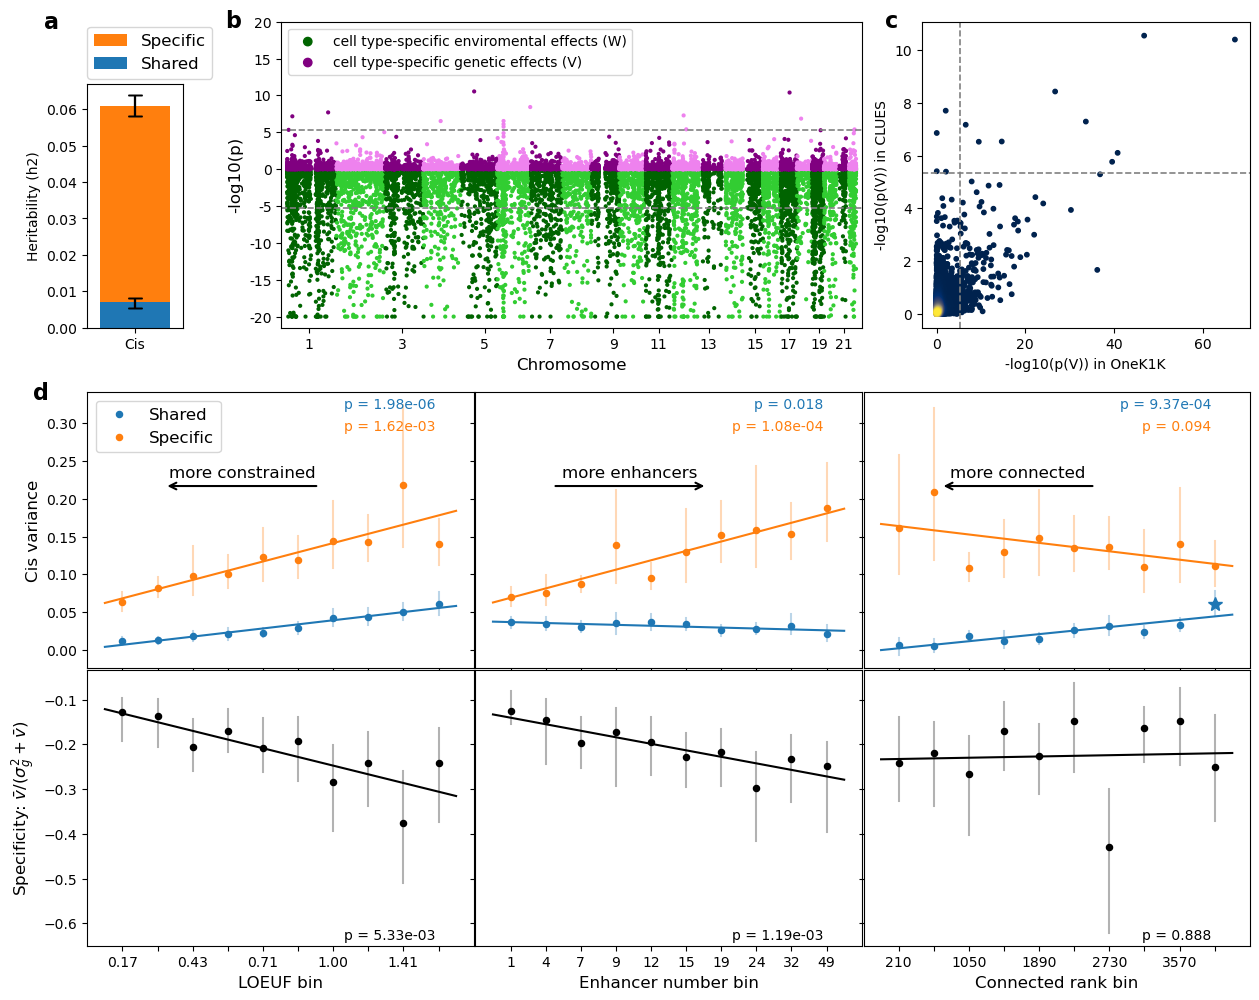

In [15]:
# plot
# filter without s.e.(specificity)
print(mega_gf.shape)
mega_gf_data = mega_gf.loc[mega_gf['g'] > 0, :].copy()

# rerank connectness
mega_gf_data['combined_connected_rank'] = mega_gf_data['combined_connected_rank'].rank(method='first')

annotations = ['LOEUF', 'ActivityLinking_EnhancerNumber', 'combined_connected_rank']
print(mega_gf_data.shape, mega_gf_data[annotations].dropna(how='all').shape, (~mega_gf_data['LOEUF'].isna()).sum(), 
      (~mega_gf_data['ActivityLinking_EnhancerNumber'].isna()).sum(), (~mega_gf_data['combined_connected_rank'].isna()).sum())


colors = sns.color_palette()
fs = 12
lw = 1.5
alpha = .3
format_p = lambda p: f'{p:.2e}' if p < 0.01 else f'{p:.3f}'

fig = plt.figure(1, figsize=(15, 12))
gs = gridspec.GridSpec(30, 60, wspace=0.1, hspace=.1)

# cis h2
ax = fig.add_subplot(gs[2:10, :5])

labels = 'Cis'
bottom = np.zeros(len(labels))
values = np.array([mega_shared_h2])
ci = np.array([mega_shared_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, yerr=yerr.T, capsize=5,
    bottom=bottom, color=colors[0], edgecolor='none', label='Shared')

bottom += values
values = np.array([mega_specific_h2])
ci = np.array([mega_specific_h2_ci])
yerr = np.abs(ci - values[:, np.newaxis])
ax.bar(labels, values, yerr=yerr.T, capsize=5,
        bottom=bottom, color=colors[1], edgecolor='none', label='Specific')
# ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
ax.legend(loc=(0, 1.02), reverse=True, fontsize=fs)
ax.set_ylabel('Heritability (h2)')
xlims = ax.get_xlim()
ax.set_xlim((xlims[0] - 0.1, xlims[1] + 0.1))

ax.text(-0.3, 1.3, 'a', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')


# V & W
ax = fig.add_subplot(gs[:10, 10:40])
light_dark_green = mcolors.ListedColormap(['violet', 'purple'])
light_dark_blue = mcolors.ListedColormap(['limegreen', 'darkgreen'])
cut = -np.log10(0.05 / mega.shape[0])
v = 'p_V'
w = 'p_W'
print('Number of genes:', mega.shape)
print('Cut:', 0.05 / mega.shape[0])
print('Number of sig genes:', mega.loc[mega[v] > cut, :].shape, mega.loc[mega[w] > cut, :].shape)
ax.scatter(mega['start_cum'], -(mega[w].clip(np.nan, 20)), c=mega['chr'] % 2, cmap=light_dark_blue, s=4, label='cell type-specific enviromental effects (W)')
ax.scatter(mega['start_cum'], mega[v], c=mega['chr'] % 2, cmap=light_dark_green, s=4, label='cell type-specific genetic effects (V)')
ax.set_xticks(chr_ticks[::2])
ax.set_xticklabels(mega['chr'].unique()[::2])
ax.set_xlabel('Chromosome', fontsize=fs)
ax.set_ylabel('-log10(p)', fontsize=fs)
ax.axhline(cut, color='0.5', lw=1.2, ls='--')
ax.axhline(-cut, color='0.5', lw=1.2, ls='--')
ax.set_xlim(- mega['start_cum'].max() * 0.01, mega['start_cum'].max() * (1 + 0.01))
# yticks = ax.get_yticks()
# ytick_labels = [f"{abs(int(tick))}" for tick in yticks]
yticks = np.arange(-20, 21, 5)
ytick_labels = yticks.astype(int).astype(str)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
# ax.set_ylim((-21, 21))
ax.legend(markerscale=3, loc='upper left')

ax.text(-0.07, 1.04, 'b', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')


# Perez vs Yazar
ax = fig.add_subplot(gs[:10, 43:])
tmp = mega.merge(yazar)
print(tmp.shape)
plot.scatter(tmp['p_yazar_V'], tmp['p_V'], ax=ax, color='0.5', s=10, heatscatter=True)
p_cut = -np.log10(0.05 / mega.shape[0])
ax.axhline(p_cut, color='0.5', lw=1.2, ls='--')
ax.axvline(p_cut, color='0.5', lw=1.2, ls='--')
ax.set_xlabel('-log10(p(V)) in OneK1K')
ax.set_ylabel('-log10(p(V)) in CLUES')

ax.text(-0.07, 1.04, 'c', transform=ax.transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')


# gene feature
### divide gene annotation into bins
for annotation in annotations:
    mega_gf_data = plot.bin_gene_annotation(mega_gf_data, annotation, 10)

# mega regression for combined connectivity
connectivity_data = mega_gf_data[['hom_g2', 'combined_connected_rank', 'combined_connected_rank_bin']].dropna()
print(connectivity_data.shape)
X = sm.add_constant(connectivity_data['combined_connected_rank'])
model = sm.OLS(connectivity_data['hom_g2'], X).fit()
# print(model.summary())
print('Mega regression:\n', model.pvalues)

# t test
least_connected_bin = connectivity_data['combined_connected_rank_bin'].max()
least_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] == least_connected_bin]
other_connected = connectivity_data.loc[connectivity_data['combined_connected_rank_bin'] != least_connected_bin]
print(least_connected['hom_g2'].mean() / other_connected['hom_g2'].mean())
print(stats.ttest_ind(least_connected['hom_g2'], other_connected['hom_g2']))


ax11 = fig.add_subplot(gs[12:21, :20])
ax12 = fig.add_subplot(gs[12:21, 20:40], sharey=ax11)
ax13 = fig.add_subplot(gs[12:21, 40:], sharey=ax11)
ax21 = fig.add_subplot(gs[21:, :20], sharex=ax11)
ax22 = fig.add_subplot(gs[21:, 20:40], sharex=ax12, sharey=ax21)
ax23 = fig.add_subplot(gs[21:, 40:], sharex=ax13, sharey=ax21)
axes = np.array([[ax11, ax12, ax13],
                [ax21, ax22, ax23]])


for j, annotation in enumerate(annotations):
    grouped = mega_gf_data.groupby(annotation + '_bin', observed=True)

    line1, p1, slope1, intercept1 = plot.meta_regression(grouped, 'hom_g2', 'mean', return_params=True)
    line2, p2, slope2, intercept2 = plot.meta_regression(grouped, 'V', 'mean', return_params=True)


    ax = axes[0, j]
    sns.pointplot(data=mega_gf_data, x=annotation + '_bin', y='hom_g2', estimator='mean',
                markers='.', linestyles='none', color=colors[0], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Shared', ax=ax)
    xs = np.array(ax.get_xlim())
    ax.plot(xs, slope1 * xs + intercept1, color=colors[0], lw=lw, linestyle='-')

    sns.pointplot(data=mega_gf_data, x=annotation + '_bin', y='V', estimator='mean',
                markers='.', linestyles='none', color=colors[1], err_kws={'alpha': alpha, 'linewidth': 1.5},
                label=r'Specific', ax=ax)
    ax.plot(xs, slope2 * xs + intercept2, color=colors[1], lw=lw, linestyle='-')
    
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelbottom=False)


    # add p values
    x = 0.9
    y = 0.98
    ax.text(x, y, f'p = {format_p(p1)}', fontsize=fs-2, color=colors[0], ha='right', va='top', transform=ax.transAxes)
    y -= .08
    ax.text(x, y, f'p = {format_p(p2)}', fontsize=fs-2, color=colors[1], ha='right', va='top', transform=ax.transAxes)


    ax2 = axes[1, j]
    line, p, slope, intercept = plot.meta_regression(grouped, 'specificity', 'median', return_params=True)
    sns.pointplot(data=mega_gf_data, x=annotation + '_bin', y='specificity', estimator='median', 
                  markers='.', linestyles='none', color='k', err_kws={'alpha': alpha, 'linewidth': 1.5}, ax=ax2)
    xs = np.array(ax2.get_xlim())
    ax2.plot(xs, slope * xs + intercept, color='k', lw=lw, linestyle='-')

    ax2.text(x, 0.01, f'p = {format_p(p)}', fontsize=fs-2, color='k', ha='right', va='bottom', transform=ax2.transAxes)

    xlabel = re.sub('_', ' ', annotation + '_bin')
    if annotation == 'ActivityLinking_EnhancerNumber':
        xlabel = 'Enhancer number bin'
    elif annotation == 'combined_connected_rank':
        xlabel = 'Connected rank bin'

    if annotation in ['LOEUF', 'EDS', 'combined_connected_rank']:
        # set x tick labels
        xticklabels = []
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % 2 == 0:
                xticklabels.append(label.get_text())
            else:
                xticklabels.append('')
        ax2.set_xticks(ax2.get_xticks())
        ax2.set_xticklabels(xticklabels)

    ax2.set_xlabel(xlabel, fontsize=fs)

    if j == 0:
        ax.set_ylabel('Cis variance', fontsize=fs)
        ax2.set_ylabel('Specificity: ' + r'$\bar{v}/(\sigma_g^2 + \bar{v})$', fontsize=fs)
    else:
        ax.tick_params(axis='y', labelleft=False)
        ax2.tick_params(axis='y', labelleft=False)
        ax.set_ylabel('')
        ax2.set_ylabel('')
    
    if j != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(fontsize=fs)

# add arrow
x, y = 0.6, 0.66
length = 0.4
arrow_position = (x, y)
axes[0, 0].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=arrow_position,
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs, ha='center', va='center', xycoords=axes[0, 0].transAxes)
axes[0, 0].text(x - length / 2, y + .02, 'more constrained', ha='center', va='bottom', 
                fontsize=fs, transform=axes[0, 0].transAxes)

axes[0, 2].annotate('', xy=(arrow_position[0] - length, arrow_position[1]), xytext=arrow_position,
        arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
        fontsize=fs, ha='center', va='center', xycoords=axes[0, 2].transAxes)
axes[0, 2].text(x - length / 2, y + .02, 'more connected', ha='center', va='bottom', 
                fontsize=fs, transform=axes[0, 2].transAxes)

axes[0, 1].annotate('', xy=(arrow_position[0], arrow_position[1]), xytext=(arrow_position[0] - length, arrow_position[1]),
            arrowprops=dict(color='black', arrowstyle='->', lw=1.5),
            fontsize=fs, ha='center', va='center', xycoords=axes[0, 1].transAxes)
axes[0, 1].text(x - length / 2, y + .02, 'more enhancers', ha='center', va='bottom', 
                fontsize=fs, transform=axes[0, 1].transAxes)

# add a star to connectedness vs shared
axes[0, 2].plot(9, mega_gf_data.loc[mega_gf_data['combined_connected_rank_bin'] == mega_gf_data['combined_connected_rank_bin'].max(), 'hom_g2'].mean(), 
                marker='*', color=colors[0], markersize=10, zorder=10)

axes[0, 0].text(-0.1, 1.04, 'd', transform=axes[0, 0].transAxes, fontsize=fs + 4, fontweight='bold', va='top', ha='right')

fig.tight_layout()


# PCA

In [16]:
all_pca = np.loadtxt('../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/all.all/geno.eigenval')
euro_ctrl_pca = np.loadtxt('../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.Healthy/geno.eigenval')
euro_case_pca = np.loadtxt('../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.SLE/geno.eigenval')
asia_case_pca = np.loadtxt('../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/Asian.SLE/geno.eigenval')

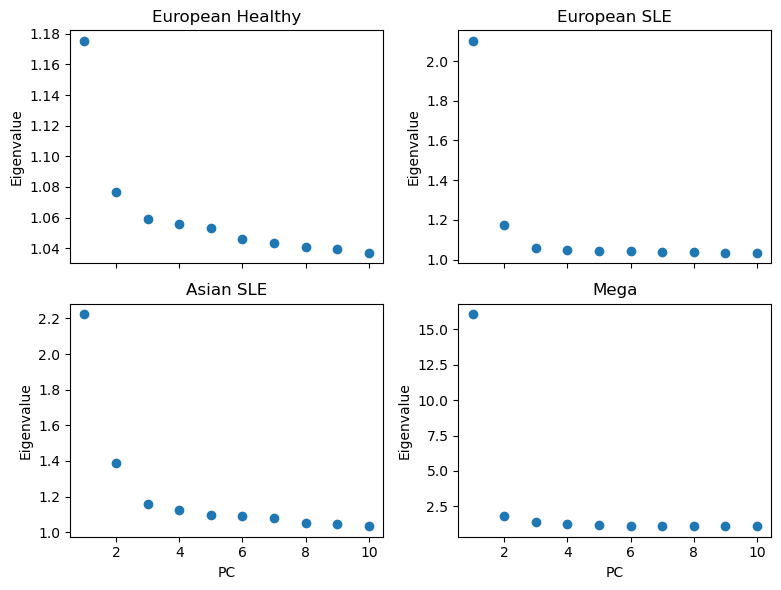

In [17]:
# plot
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

axes[0, 0].scatter(np.arange(1, 11), euro_ctrl_pca[:10])
axes[0, 0].set_title('European Healthy')
axes[0, 1].scatter(np.arange(1, 11), euro_case_pca[:10])
axes[0, 1].set_title('European SLE')
axes[1, 0].scatter(np.arange(1, 11), asia_case_pca[:10])
axes[1, 0].set_title('Asian SLE')
axes[1, 1].scatter(np.arange(1, 11), all_pca[:10])
axes[1, 1].set_title('Mega')

axes[0, 0].set_ylabel('Eigenvalue')
axes[0, 1].set_ylabel('Eigenvalue')
axes[1, 0].set_ylabel('Eigenvalue')
axes[1, 1].set_ylabel('Eigenvalue')
axes[1, 0].set_xlabel('PC')
axes[1, 1].set_xlabel('PC')

fig.tight_layout()

In [18]:
# # trans
# euro_cont_trans_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.Healthy/trans/he.npy'
# euro_case_trans_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/European.SLE/trans/he.npy'
# asia_case_trans_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/Asian.SLE/trans/he.npy'
# meta_trans_f = '../../analysis/perez/ind_min_cellnum~10_ct_min_cellnum~10_prop~0.9/he.free.trans.meta.npy'

# euro_cont_trans = np.load(euro_cont_trans_f, allow_pickle=True).item()
# euro_case_trans = np.load(euro_case_trans_f, allow_pickle=True).item()
# asia_case_trans = np.load(asia_case_trans_f, allow_pickle=True).item()
# meta_trans = np.load(meta_trans_f, allow_pickle=True).item()

# genes = meta_trans['gene']
# euro_cont_filter = np.isin(euro_cont_trans['gene'], genes)
# euro_case_filter = np.isin(euro_case_trans['gene'], genes)
# asia_case_filter = np.isin(asia_case_trans['gene'], genes)

In [19]:
# # h2
# rng = np.random.default_rng(42)

# func = lambda x: np.median(x)
# # func = lambda x: np.mean(x)
# # cis
# euro_cont_cis_ctp_shared_h2 = func(euro_cont_trans['free']['shared_h2'][euro_cont_filter])
# euro_cont_cis_ctp_specific_h2 = func(euro_cont_trans['free']['specific_h2'][euro_cont_filter])
# euro_case_cis_ctp_shared_h2 = func(euro_case_trans['free']['shared_h2'][euro_case_filter])
# euro_case_cis_ctp_specific_h2 = func(euro_case_trans['free']['specific_h2'][euro_case_filter])
# asia_case_cis_ctp_shared_h2 = func(asia_case_trans['free']['shared_h2'][asia_case_filter])
# asia_case_cis_ctp_specific_h2 = func(asia_case_trans['free']['specific_h2'][asia_case_filter])
# meta_cis_ctp_shared_h2 = func(meta_trans['free']['shared_h2'])
# meta_cis_ctp_specific_h2 = func(meta_trans['free']['specific_h2'])


# euro_cont_cis_ctp_shared_h2_ci = stats.bootstrap((euro_cont_trans['free']['shared_h2'][euro_cont_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_cont_cis_ctp_specific_h2_ci = stats.bootstrap((euro_cont_trans['free']['specific_h2'][euro_cont_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_case_cis_ctp_shared_h2_ci = stats.bootstrap((euro_case_trans['free']['shared_h2'][euro_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_case_cis_ctp_specific_h2_ci = stats.bootstrap((euro_case_trans['free']['specific_h2'][euro_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# asia_case_cis_ctp_shared_h2_ci = stats.bootstrap((asia_case_trans['free']['shared_h2'][asia_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# asia_case_cis_ctp_specific_h2_ci = stats.bootstrap((asia_case_trans['free']['specific_h2'][asia_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# meta_cis_ctp_shared_h2_ci = stats.bootstrap((meta_trans['free']['shared_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# meta_cis_ctp_specific_h2_ci = stats.bootstrap((meta_trans['free']['specific_h2'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval

# # trans
# euro_cont_trans_ctp_shared_h2 = func(euro_cont_trans['free']['shared_h2_b'][euro_cont_filter])
# euro_cont_trans_ctp_specific_h2 = func(euro_cont_trans['free']['specific_h2_b'][euro_cont_filter])
# euro_case_trans_ctp_shared_h2 = func(euro_case_trans['free']['shared_h2_b'][euro_case_filter])
# euro_case_trans_ctp_specific_h2 = func(euro_case_trans['free']['specific_h2_b'][euro_case_filter])
# asia_case_trans_ctp_shared_h2 = func(asia_case_trans['free']['shared_h2_b'][asia_case_filter])
# asia_case_trans_ctp_specific_h2 = func(asia_case_trans['free']['specific_h2_b'][asia_case_filter])
# meta_trans_ctp_shared_h2 = func(meta_trans['free']['shared_h2_b'])
# meta_trans_ctp_specific_h2 = func(meta_trans['free']['specific_h2_b'])


# euro_cont_trans_ctp_shared_h2_ci = stats.bootstrap((euro_cont_trans['free']['shared_h2_b'][euro_cont_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_cont_trans_ctp_specific_h2_ci = stats.bootstrap((euro_cont_trans['free']['specific_h2_b'][euro_cont_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_case_trans_ctp_shared_h2_ci = stats.bootstrap((euro_case_trans['free']['shared_h2_b'][euro_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# euro_case_trans_ctp_specific_h2_ci = stats.bootstrap((euro_case_trans['free']['specific_h2_b'][euro_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# asia_case_trans_ctp_shared_h2_ci = stats.bootstrap((asia_case_trans['free']['shared_h2_b'][asia_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# asia_case_trans_ctp_specific_h2_ci = stats.bootstrap((asia_case_trans['free']['specific_h2_b'][asia_case_filter],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# meta_trans_ctp_shared_h2_ci = stats.bootstrap((meta_trans['free']['shared_h2_b'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval
# meta_trans_ctp_specific_h2_ci = stats.bootstrap((meta_trans['free']['specific_h2_b'],), func, vectorized=False, paired=False, random_state=rng).confidence_interval


In [20]:
# # plot
# colors = sns.color_palette()

# fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
# labels = ['Euro.Healthy', 'Euro.Lupus', 'Asian.Lupus', 'Meta']
# width = .6

# # cis
# ax = axes[0]
# bottom = np.zeros(len(labels))
# values = np.array([euro_cont_cis_ctp_shared_h2, euro_case_cis_ctp_shared_h2, asia_case_cis_ctp_shared_h2, meta_cis_ctp_shared_h2])
# ci = np.array([euro_cont_cis_ctp_shared_h2_ci, euro_case_cis_ctp_shared_h2_ci, asia_case_cis_ctp_shared_h2_ci, meta_cis_ctp_shared_h2_ci])
# yerr = np.abs(ci - values[:, np.newaxis])
# ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
#     bottom=bottom, color=colors[0], edgecolor='none', label='Shared')

# bottom += values
# values = np.array([euro_cont_cis_ctp_specific_h2, euro_case_cis_ctp_specific_h2, asia_case_cis_ctp_specific_h2, meta_cis_ctp_specific_h2])
# ci = np.array([euro_cont_cis_ctp_specific_h2_ci, euro_case_cis_ctp_specific_h2_ci, asia_case_cis_ctp_specific_h2_ci, meta_cis_ctp_specific_h2_ci])
# yerr = np.abs(ci - values[:, np.newaxis])
# ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
#         bottom=bottom, color=colors[1], edgecolor='none', label='Specific')
# # ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
# ax.legend(loc='upper left', reverse=True, fontsize=12)
# ax.set_ylabel('Heritability (h2)', fontsize=16)
# ax.set_title('Cis', fontsize=20)

# # print(cis_ctp_specific_h2 / (cis_ctp_specific_h2 + cis_ctp_shared_h2))
# # print(cis_op_specific_h2 / (cis_op_specific_h2 + cis_op_shared_h2))

# # trans
# ax = axes[1]
# bottom = np.zeros(len(labels))
# values = np.array([euro_cont_trans_ctp_shared_h2, euro_case_trans_ctp_shared_h2, asia_case_trans_ctp_shared_h2, meta_trans_ctp_shared_h2])
# ci = np.array([euro_cont_trans_ctp_shared_h2_ci, euro_case_trans_ctp_shared_h2_ci, asia_case_trans_ctp_shared_h2_ci, meta_trans_ctp_shared_h2_ci])
# yerr = np.abs(ci - values[:, np.newaxis])
# ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
#     bottom=bottom, color=colors[0], edgecolor='none', label='Shared')

# bottom += values
# values = np.array([euro_cont_trans_ctp_specific_h2, euro_case_trans_ctp_specific_h2, asia_case_trans_ctp_specific_h2, meta_trans_ctp_specific_h2])
# ci = np.array([euro_cont_trans_ctp_specific_h2_ci, euro_case_trans_ctp_specific_h2_ci, asia_case_trans_ctp_specific_h2_ci, meta_trans_ctp_specific_h2_ci])
# yerr = np.abs(ci - values[:, np.newaxis])
# ax.bar(labels, values, width, yerr=yerr.T, capsize=5,
#         bottom=bottom, color=colors[1], edgecolor='none', label='Specific')
# # ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
# ax.legend(loc='upper left', reverse=True, fontsize=12)
# ax.set_ylabel('Heritability (h2)', fontsize=16)
# ax.set_title('Trans', fontsize=20)

# fig.tight_layout()